<a href="https://colab.research.google.com/github/dtubbenhauer/sl2-charp/blob/main/For_GitHub_sl2char3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Creating test data

We want ot learn the following problem. Take SL2(bar(F_3)) and its standard representation V. Let f(n)=number of summands in V^otimes n. Task: learn the function starting from random inputs guessing that the answer is of the form scalar n^(alpha) 2^n; we know alpha, so this is all about the scalar

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu121'

In [ ]:
# Create data; ignoring the 2^n since we already know that this factor will appear
start = 1
end = 1501
step = 1
n = torch.arange(start, end, step).unsqueeze(dim=1)
fn = torch.tensor([0.50000000000000000000, 0.50000000000000000000, \
0.25000000000000000000, 0.31250000000000000000, \
0.18750000000000000000, 0.23437500000000000000, \
0.16406250000000000000, 0.19531250000000000000, \
0.15039062500000000000, 0.17187500000000000000, \
0.13964843750000000000, 0.15551757812500000000, \
0.13012695312500000000, 0.14282226562500000000, \
0.12139892578125000000, 0.13229370117187500000, \
0.11336517333984375000, 0.12321853637695312500, \
0.10600090026855468750, 0.11522483825683593750, \
0.099287509918212890625, 0.10809874534606933594, \
0.093197107315063476563, 0.10170346498489379883, \
0.087692141532897949219, 0.095941886305809020996, \
0.082728751003742218018, 0.090738780796527862549, \
0.078260272741317749023, 0.086032114923000335693, \
0.074239957146346569061, 0.081768691074103116989, \
0.070622788975015282631, 0.077901866286993026733, \
0.067366572329774498940, 0.074390273031895048916, \
0.064432480947289150208, 0.071197025419678539038, \
0.061785248557498562150, 0.068289163781628303695, \
0.059393131801243725931, 0.065637220924372741138, \
0.057227739128052235174, 0.063214855980561424076, \
0.055263788420518267230, 0.060998531365271446703, \
0.053478833835356454074, 0.058967221932419988661, \
0.051852986955237767575, 0.057102151373437770587, \
0.050368647046948655799, 0.055386553305617258758, \
0.049010248518744914392, 0.053805455336057628202, \
0.047764029420226866707, 0.052345484590463078889, \
0.046617822212104330359, 0.050994693185664626695, \
0.045560866484053094694, 0.049742402077876341458, \
0.044583642433921165209, 0.048579061699478252867, \
0.043677723487153574970, 0.047496127820150149418, \
0.042835646265648367597, 0.046485951128668726923, \
0.042050796103312108969, 0.045541679119049944267, \
0.041317306383167188881, 0.044657168968309977845, \
0.040629970095175818449, 0.043826910204197056368, \
0.039984162158627581800, 0.043045956073391580863, \
0.039375771202181338651, 0.042309862629530332702, \
0.038801139639357139675, 0.041614634663264991788, \
0.038257011012549302809, 0.040956677691903192360, \
0.037740483702189135319, 0.040332755313332184541, \
0.037248970208806937609, 0.039739951307783894402, \
0.036780161314625501116, 0.039175635941816181694, \
0.036331994518662485963, 0.038637435992120819289, \
0.035902626216075951638, 0.038123208062999012818, \
0.035490407159697597533, 0.037631014821191145990, \
0.035093860800404604310, 0.037159103815833451551, \
0.034711664154175628794, 0.036705888590242468590, \
0.034342630888275113763, 0.036269931826562893662, \
0.033985696357840653933, 0.035849930294575090872, \
0.033639904357949336691, 0.035444701402616567549, \
0.033304395385663382756, 0.035053171172051056482, \
0.032978396232175837038, 0.034674363477397920760, \
0.032661210747493834742, 0.034307390412449504810, \
0.032352211639545672875, 0.033951443658752113341, \
0.032050833186556887855, 0.033605786746969771177, \
0.031756564756337881412, 0.033269748114119657996, \
0.031468945039045619404, 0.032942714870667028294, \
0.031187556911270710839, 0.032624127201173672219, \
0.030912022859171873569, 0.032313473330763861192, \
0.030642000897016926646, 0.032010284997242350490, \
0.030377180925052814465, 0.031714133375390599628, \
0.030117281477255207516, 0.031424625405885341430, \
0.029862046815320941879, 0.031141400486520437456, \
0.029611244330368035283, 0.030864127488049704351, \
0.029364662218288581384, 0.030592502061076251305, \
0.029122107398637926054, 0.030326244204055307477, \
0.028883403650407352378, 0.030065096065707406857, \
0.028648389941076347580, 0.029808819958005344579, \
0.028416918928026014026, 0.029557196558443902561, \
0.028188855613762282615, 0.029310023282563237883, \
0.027964076138485488712, 0.029067112809707837188, \
0.027742466695385775968, 0.028828291746791947590, \
0.027523922555671559245, 0.028593399416434844902, \
0.027308347191776991694, 0.028362286757247624184, \
0.027095651488466853020, 0.028134815325317178985, \
0.026885753032683465183, 0.027910856387060133062, \
0.026678575473977624947, 0.027690290094625117450, \
0.026474047948249434072, 0.027473004735919565894, \
0.026272104558308735279, 0.027258896052139171799, \
0.026072683905460408219, 0.027047866616394957886, \
0.025875728666937389375, 0.026839825267673978040, \
0.025681185214553042814, 0.026634686594943342376, \
0.025489003270432415763, 0.026432370466720921765, \
0.025299135596115994118, 0.026232801601896297895, \
0.025111537711716016399, 0.026035909177998088540, \
0.024926167642149660911, 0.025841626473473849617, \
0.024742985687780293945, 0.025649890540880911785, \
0.024561954217071693200, 0.025460641908184813950, \
0.024383037479104478462, 0.025273824305630061176, \
0.024206201434022191609, 0.025089384415888971268, \
0.024031413599669486024, 0.024907271645411239758, \
0.023858642912859289138, 0.024727437915092089647, \
0.023687859603861870661, 0.024549837468552744436, \
0.023519035082848500800, 0.024374426696485487951, \
0.023352141837147603704, 0.024201163975658550664, \
0.023187153338283584557, 0.024030009521305093360, \
0.023024043957869237146, 0.023860925251737076485, \
0.022862788891513067247, 0.023693874664130084953, \
0.022703364089984100290, 0.023528822720520365169, \
0.022545746196949760691, 0.023365735743141443617, \
0.022389912492668086516, 0.023204581318305646791, \
0.022235840843074651896, 0.023045328208106446812, \
0.022083509653757800322, 0.022887946269281546273, \
0.021932897828363758218, 0.022732406378634644221, \
0.021783984731016446836, 0.022578680364466479067, \
0.021636750152375828482, 0.022426740943513549584, \
0.021491174278993844986, 0.022276561662936343627, \
0.021347237665658819614, 0.022128116846938379398, \
0.021204921210447944524, 0.021981381547633266241, \
0.021064206132233473414, 0.021836331499809662923, \
0.020925073950411759766, 0.021692943079273758534, \
0.020787506466645572080, 0.021551193264476000903, \
0.020651485748429400187, 0.021411059601153498876, \
0.020516994114304939159, 0.021272520169742052017, \
0.020384014120569777215, 0.021135553555332316408, \
0.020252528549336680538, 0.021000138819963380498, \
0.020122520397813904065, 0.020866255477064164755, \
0.019993972868688791371, 0.020733883467868721742, \
0.019866869361507673999, 0.020603003139645833248, \
0.019741193464954844814, 0.020473595225596399538, \
0.019616928949942254170, 0.020345640826284102225, \
0.019494059763429646146, 0.020219121392475796086, \
0.019372570022902190134, 0.020094018709278136095, \
0.019252444011439339106, 0.019970314881466155516, \
0.019133666173314721195, 0.019847992319907952957, \
0.019016221110072401426, 0.019727033728997387742, \
0.018900093577029885622, 0.019607422095013784652, \
0.018785268480162823882, 0.019489140675334166298, \
0.018671730873330547660, 0.019372172988429514142, \
0.018559465955805379303, 0.019256502804582053348, \
0.018448459070072119553, 0.019142114137265603511, \
0.018338695699867277284, 0.019028991235135674862, \
0.018230161468430484285, 0.018917118574580252128, \
0.018122842136943161042, 0.018806480852786127199, \
0.018016723603131890036, 0.018697062981279245850, \
0.017911791900016131508, 0.018588850079900848957, \
0.017808033194781901731, 0.018481827471184238873, \
0.017705433787764842531, 0.018375980675099808656, \
0.017603980111527758549, 0.018271295404138555467, \
0.017503658730019199634, 0.018167757558706678075, \
0.017404456337801032601, 0.018065353222806048401, \
0.017306359759334190990, 0.017964068659977363911, \
0.017209355948312924095, 0.017863890309484645162, \
0.017113431987038897071, 0.017764804782721453811, \
0.017018575085827431190, 0.017666798859820782628, \
0.016924772582439025358, 0.017569859486452021167, \
0.016832011941530074212, 0.017473973770789738726, \
0.016740280754117401165, 0.017379128980640258990, \
0.016649566737051862827, 0.017285312540713136703, \
0.016559857732496859871, 0.017192512030025693394, \
0.016471141707408113798, 0.017100715179429733704, \
0.016383406753011543834, 0.017009909869250452555, \
0.016296641084276507670, 0.016920084127028362287, \
0.016210833039382057838, 0.016831226125355823352, \
0.016125971079174215799, 0.016743324179800457265, \
0.016042043786612581579, 0.016656366746908360837, \
0.015959039866204881046, 0.016570342422280630536, \
0.015876948143428308365, 0.016485239938717249064, \
0.015795757564136750416, 0.016401048164422886473, \
0.015715457193953185256, 0.016317756101269628740, \
0.015636036217646730112, 0.016235352883112070702, \
0.015557483938493978001, 0.016153827774150600500, \
0.015479789777624407465, 0.016073170167339061717, \
0.015402943273349778868, 0.015993369582833309753, \
0.015326934080477544597, 0.015914415666477482718, \
0.015251751969608400798, 0.015836298188325086450, \
0.015177386826418196136, 0.015759007041192249949, \
0.015103828650924489648, 0.015682532239240743372, \
0.015031067556738116189, 0.015606863916588567340, \
0.014959093770300175068, 0.015531992325946121186, \
0.014887897630104906238, 0.015457907837276140225, \
0.014817469585908959593, 0.015384600936475759558, \
0.014747800197927597237, 0.015312062224079215303, \
0.014678880136018396786, 0.015240282413979834812, \
0.014610700178853046361, 0.015169252332170096135, \
0.014543251213077839565, 0.015098962915498654836, \
0.014476524232463491868, 0.015029405210443344028, \
0.014410510337044908994, 0.014960570371899251978, \
0.014345200732251543406, 0.014892449661981071547, \
0.014280586728028977425, 0.014825034448838997816, \
0.014216659737952370992, 0.014758316205487525051, \
0.014153411278332409165, 0.014692286508646562282, \
0.014090832967314379222, 0.014626937037594348790, \
0.014028916523971000159, 0.014562259573031707127, \
0.013967653767389618528, 0.014498245995957222448, \
0.013907036615754374300, 0.014434888286552983314, \
0.013847057085423928863, 0.014372178523080561105, \
0.013787707290005334637, 0.014310108880786943157, \
0.013728979439424612212, 0.014248671630820168975, \
0.013670865838994586623, 0.014187859139154449764, \
0.013613358888480519348, 0.014127663865524579279, \
0.013556451081164057221, 0.014068078362369468869, \
0.013500135002906003513, 0.014009095273784661949, \
0.013444403331208400302, 0.013950707334483702984, \
0.013389248834276394851, 0.013892907368768253840, \
0.013334664370080346213, 0.013835688289506866071, \
0.013280642885418611680, 0.013779043097122331626, \
0.013227177414981436157, 0.013722964878587546730, \
0.013174261080416351007, 0.013667446806429834399, \
0.013121887089395472516, 0.013612482137743680466, \
0.013070048734685073879, 0.013558064213211846063, \
0.013018739393217788567, 0.013504186456134826514, \
0.012967952525167787083, 0.013450842371468632537, \
0.012917681673029253551, 0.013398025544870874683, \
0.012867920460698473311, 0.013345729641755136095, \
0.012818662592559827654, 0.013293948406353622142, \
0.012769901852575977204, 0.013242675660788078165, \
0.012721632103382501099, 0.013191905304148968749, \
0.012673847285387245133, 0.013141631311582913477, \
0.012626541415874618389, 0.013091847733388375234, \
0.012579708588115064635, 0.013042548694119597773, \
0.012533342970479921852, 0.012993728391698789499, \
0.012487438805561870729, 0.012945381096536550393, \
0.012441990409301160846, 0.012897501150660538554, \
0.012396992170117791459, 0.012850082966852372252, \
0.012352438548049812434, 0.012803121027792762460, \
0.012308324073897899856, 0.012756609885214869794, \
0.012264643348376350188, 0.012710544159065878511, \
0.012221391041270626575, 0.012664918536676778851, \
0.012178561890601580998, 0.012619727771940347484, \
0.012136150701796466401, 0.012574966684497314193, \
0.012094152346866843739, 0.012530630158930701272, \
0.012052561763593480034, 0.012486713143968320300, \
0.012011373954718325013, 0.012443210651693409200, \
0.011970583987143645730, 0.012400117756763390611, \
0.011930186991138390735, 0.012357429595636730749, \
0.011890178159551847798, 0.012315141365807876075, \
0.011850552747034652003, 0.012273248325050243174, \
0.011811306069267194100, 0.012231745790667235419, \
0.011772433502195472390, 0.012190629138751258133, \
0.011733930481274425075, 0.012149893803450702118, \
0.011695792500718773978, 0.012109535276244863642, \
0.011658015112761404735, 0.012069549105226767208, \
0.011620593926919303054, 0.012029930894393855700, \
0.011583524609267061384, 0.011990676302946510820, \
0.011546802881717965313, 0.011951781044594365116, \
0.011510424521312664247, 0.011913240886870365283, \
0.011474385359515426375, 0.011875051650452544930, \
0.011438681281517973626, 0.011837209208493463496, \
0.011403308225550888191, 0.011799709485957266594, \
0.011368262182202578329, 0.011762548458964321695, \
0.011333539193745787463, 0.011725722154143381766, \
0.011299135353471627072, 0.011689226647991228201, \
0.011265046805031110611, 0.011653058066239743243, \
0.011231269741784162521, 0.011617212583230360917, \
0.011197800406156073466, 0.011581686421295844449, \
0.011164635089001370148, 0.011546475850149337140, \
0.011131770128975065407, 0.011511577186280632680, \
0.011099201911911251865, 0.011476986792359610019, \
0.011066926870209000043, 0.011442701076646777064, \
0.011034941482225519689, 0.011408716492410866659, \
0.011003242271676541044, 0.011375029537353427628, \
0.010971825807043870835, 0.011341636753040352916, \
0.010940688700990076001, 0.011308534724340286313, \
0.010909827609780246531, 0.011275720078869848589, \
0.010879239232710787187, 0.011243189486445623431, \
0.010848920311545186511, 0.011210939658542843023, \
0.010818867629956710132, 0.011178967347760712726, \
0.010789078012977964202, 0.011147269347294313926, \
0.010759548326457273629, 0.011115842490413023766, \
0.010730275476521818759, 0.011084683649945390192, \
0.010701256409047473187, 0.011053789737770400505, \
0.010672488109135284542, 0.011023157704315081369, \
0.010643967600594539276, 0.010992784538058368081, \
0.010615691945432351796, 0.010962667265041180749, \
0.010587658243349717659, 0.010932802948382644952, \
0.010559863631243969946, 0.010903188687802394363, \
0.010532305282717577489, 0.010873821619148892801, \
0.010504980407593223141, 0.010844698913933713185, \
0.010477886251435099953, 0.010815817778871710876, \
0.010451020095076362763, 0.010787175455427028975, \
0.010424379254152672487, 0.010758769219364873218, \
0.010397961078641770163, 0.010730596380308994244, \
0.010371762952409017653, 0.010702654281304815133, \
0.010345782292758841794, 0.010674940298388142305, \
0.010320016549992018734, 0.010647451840159398041, \
0.010294463206968735141, 0.010620186347363313103, \
0.010269119778677363016, 0.010593141292474018190, \
0.010243983811808884872, 0.010566314179285473178, \
0.010219052884336906140, 0.010539702542507173414, \
0.010194324605103191789, 0.010513303947365072593, \
0.010169796613408664295, 0.010487115989207662065, \
0.010145466578609800274, 0.010461136293117146768, \
0.010121332199720363328, 0.010435362513525658282, \
0.010097391205018410856, 0.010409792333836445893, \
0.010073641351658512896, 0.010384423466049986916, \
0.010050080425289121292, 0.010359253650394957888, \
0.010026706239675027856, 0.010334280654964008674, \
0.010003516636324850456, 0.010309502275354281890, \
0.0099805094841234863809, 0.010284916334312620517, \
0.0099576826789694726434, 0.010260520681385406943, \
0.0099350341434171932964, 0.010236313192572977173, \
0.0099125618263238742390, 0.010212291769988554319, \
0.0098902637025013063905, 0.010188454341521646009, \
0.0098681377723722385489, 0.010164798860505850738, \
0.0098461820616313816883, 0.010141323305391018711, \
0.0098243946209109669032, 0.010118025679419713155, \
0.0098027735254507996697, 0.010094904010307918579, \
0.0097813168747727535691, 0.010071956349929942930, \
0.0097600227923596470972, 0.010049180774007461081, \
0.0097388894253384476780, 0.010026575381802647587, \
0.0097179149441677474931, 0.010004138295815347104, \
0.0096970975423294562446, 0.0099818676614842314209, \
0.0096764354360246564800, 0.0099597616468918924803, \
0.0096559268638735676195, 0.0099378184424738213323, \
0.0096355700866195653511, 0.0099160362607312234188, \
0.0096153633868372035779, 0.0098944133359476211151, \
0.0095953050686441866337, 0.0098729479239091949525, \
0.0095753934574172400110, 0.0098516383016288154522, \
0.0095556268995118283798, 0.0098304827670737180048, \
0.0095360037619856702113, 0.0098094796388967737404, \
0.0095165224323259988554, 0.0097886272561713098340, \
0.0094971813181805204617, 0.0097679239781294332025, \
0.0094779788470920196690, 0.0097473681839038120496, \
0.0094589134662365645308, 0.0097269582722728702215, \
0.0094399836421652626803, 0.0097066926614093498363, \
0.0094211878605495212788, 0.0096865697886321981552, \
0.0094025246259297638303, 0.0096665881101617351578, \
0.0093839924614675574781, 0.0096467461008780587868, \
0.0093655899087011049405, 0.0096270422540826453179, \
0.0093473155273040557734, 0.0096074750812631028100, \
0.0093291678948475921802, 0.0095880431118610360755, \
0.0093111456065657451213, 0.0095687448930429821052, \
0.0092932472751238970040, 0.0095495789894743753637, \
0.0092754715303904277567, 0.0095305439830965028571, \
0.0092578170192114616173, 0.0095116384729064093535, \
0.0092402824051886724851, 0.0094928610747397136154, \
0.0092228663684601062025, 0.0094742104210562969755, \
0.0092055676054839786462, 0.0094556851607288260596, \
0.0091883848288254090212, 0.0094372839588340719270, \
0.0091713167669460482541, 0.0094190054964469883628, \
0.0091543621639965628905, 0.0094008484704375125173, \
0.0091375197796119353977, 0.0093828115932700515438, \
0.0091207883887095422717, 0.0093648935928056193397, \
0.0091041667812899718407, 0.0093470932121065879458, \
0.0090876537622405441442, 0.0093294092092440186018, \
0.0090712481511414957510, 0.0093118403571075379017, \
0.0090549487820747928617, 0.0092943854432177249256, \
0.0090387545034355365130, 0.0092770432695409756626, \
0.0090226641777459241786, 0.0092598126523068114672, \
0.0090066766814717325212, 0.0092426924218275987162, \
0.0089907909048412865208, 0.0092256814223206472575, \
0.0089750057516668806559, 0.0092087785117326556578, \
0.0089593201391686182724, 0.0091919825615664716694, \
0.0089437329978006357226, 0.0091752924567101367477, \
0.0089282432710796783019, 0.0091587070952681838529, \
0.0089128499154159954490, 0.0091422253883951581738, \
0.0088975518999465231151, 0.0091258462601313308046, \
0.0088823482063703216336, 0.0091095686472405758024, \
0.0088672378287862378504, 0.0090933914990503814371, \
0.0088522197735327606981, 0.0090773137772939668330, \
0.0088372930590300398102, 0.0090613344559544755789, \
0.0088224567156240371864, 0.0090454525211112182615, \
0.0088077097854327823285, 0.0090296669707879362453, \
0.0087930513221947016654, 0.0090139768148030593941, \
0.0087784803911189934890, 0.0089983810746219307868, \
0.0087639960687380200121, 0.0089828787832109718452, \
0.0087495974427616885502, 0.0089674689848937616411, \
0.0087352836119337942147, 0.0089521507352090045040, \
0.0087210536858902968817, 0.0089369231007703603965, \
0.0087069067850195055786, 0.0089217851591281128668, \
0.0086928420403241438000, 0.0089067359986326497263, \
0.0086788585932852696305, 0.0088917747182997319346, \
0.0086649555957280249137, 0.0088769004276775265052, \
0.0086511322096891880637, 0.0088621122467153795707, \
0.0086373876072865054694, 0.0088474093056343060688, \
0.0086237209705897767860, 0.0088327907447991728306, \
0.0086101314914936697583, 0.0088182557145925521638, \
0.0085966183715922405527, 0.0088038033752902233373, \
0.0085831808220551359156, 0.0087894328969382996789, \
0.0085698180635054538037, 0.0087751434592319593007, \
0.0085565293258992394584, 0.0087609342513957577658, \
0.0085433138484065942193, 0.0087468044720655013065, \
0.0085301708792943746906, 0.0087327533291716594937, \
0.0085170996758104601853, 0.0087187800398242965464, \
0.0085040995040695666857, 0.0087048838301995007544, \
0.0084911696389405858603, 0.0086910639354272917668, \
0.0084783093639354279826, 0.0086773195994809857768, \
0.0084655179710993478912, 0.0086636500750679989057, \
0.0084527947609027334277, 0.0086500546235220693600, \
0.0084401390421343360750, 0.0086365325146968792002, \
0.0084275501317959238076, 0.0086230830268610568228, \
0.0084150273549983364455, 0.0086097054465945415186, \
0.0084025700448589240811, 0.0085963990686862917222, \
0.0083901775424003494240, 0.0085831631960333188246, \
0.0083778491964507351789, 0.0085699971395410286657, \
0.0083655843635451378372, 0.0085569002180248530724, \
0.0083533824078283295284, 0.0085438717581131540496, \
0.0083412427009588698350, 0.0085309110941513834698, \
0.0083291646220144497310, 0.0085180175681074813448, \
0.0083171475573984900582, 0.0085051905294784959945, \
0.0083051909007479772005, 0.0084924293351984096579, \
0.0082932940528425188646, 0.0084797333495471533203, \
0.0082814564215146031164, 0.0084671019440607947495, \
0.0082696774215610440604, 0.0084545344974428839601, \
0.0082579564746555977873, 0.0084420303954769405384, \
0.0082462930092627324429, 0.0084295890309400674781, \
0.0082346864605525365057, 0.0084172098035176763852, \
0.0082231362703167495806, 0.0084048921197193091241, \
0.0082116418868859002434, 0.0083926353927955411790, \
0.0082002027650475356861, 0.0083804390426559522087, \
0.0081888183659655281328, 0.0083683024957881494759, \
0.0081774881571004432062, 0.0083562251851778300260, \
0.0081662116121309556369, 0.0083442065502298676888, \
0.0081549882108762979138, 0.0083322460366904111659, \
0.0081438174392197276787, 0.0083203430965699796581, \
0.0081326987890329998691, 0.0083084971880675426748, \
0.0081216317581018298129, 0.0082967077754955708482, \
0.0081106158500523336712, 0.0082849743292060447622, \
0.0080996505742784328237, 0.0082732963255174089809, \
0.0080887354458702089749, 0.0082616732466424586409, \
0.0080778699855431969529, 0.0082501045806171461446, \
0.0080670537195686023516, 0.0082385898212302956664, \
0.0080562861797044313546, 0.0082271284679542133489, \
0.0080455669031275202541, 0.0082157200258761812381, \
0.0080348954323664523581, 0.0082043640056308231684, \
0.0080242713152353501514, 0.0081930599233333309731, \
0.0080136941047685307502, 0.0081818073005135395536, \
0.0080031633591560128566, 0.0081706056640508395022, \
0.0079926786416798635888, 0.0081594545461099161274, \
0.0079822395206513737265, 0.0081483534840773038827, \
0.0079718455693490500721, 0.0081373020204987453566, \
0.0079614963659574137906, 0.0081262997030173441251, \
0.0079511914935065937463, 0.0081153460843125009192, \
0.0079409305398127040111, 0.0081044407220396227051, \
0.0079307130974189948719, 0.0080935831787705944151, \
0.0079205387635377668155, 0.0080827730219350032133, \
0.0079104071399930371185, 0.0080720098237621053143, \
0.0079003178331639488142, 0.0080612931612235255157, \
0.0078902704539289119574, 0.0080506226159766797355, \
0.0078802646176104672447, 0.0080399977743089109832, \
0.0078702999439208621930, 0.0080294182270823293237, \
0.0078603760569083302139, 0.0080188835696793465211, \
0.0078504925849040630606, 0.0080083934019488961806, \
0.0078406491604698672556, 0.0079979473281533303314, \
0.0078308454203464952424, 0.0079875449569159835162, \
0.0078210810054026421319, 0.0079771859011693955805, \
0.0078113555605845990469, 0.0079668697781041844689, \
0.0078016687348665541903, 0.0079565962091185604623, \
0.0077920201812015328902, 0.0079463648197684734017, \
0.0077824095564729679986, 0.0079361752397183845621, \
0.0077728365214468921388, 0.0079260271026926549570, \
0.0077633007407247434195, 0.0079159200464275419616, \
0.0077538018826967763492, 0.0079058537126237962576, \
0.0077443396194960698014, 0.0078958277468998512126, \
0.0077349136269531239957, 0.0078858417987455969101, \
0.0077255235845510385716, 0.0078758955214767311600, \
0.0077161691753812639453, 0.0078659885721896799171, \
0.0077068500860999182456, 0.0078561206117170796444, \
0.0076975660068846622375, 0.0078462913045838142563, \
0.0076883166313921247439, 0.0078365003189635993796, \
0.0076791016567158711846, 0.0078267473266361067678, \
0.0076699207833449079528, 0.0078170320029446218041, \
0.0076607737151227154508, 0.0078073540267542271214, \
0.0076516601592068027099, 0.0077977130804105054679, \
0.0076425798260287766145, 0.0077881088496987550344, \
0.0076335324292549188514, 0.0077785410238037105579, \
0.0076245176857472637983, 0.0077690092952697636022, \
0.0076155353155251706631, 0.0077595133599616755095, \
0.0076065850417273832768, 0.0077500529170257766037, \
0.0075976665905745710356, 0.0077406276688516453142, \
0.0075887796913323445785, 0.0077312373210342609745, \
0.0075799240762747398761, 0.0077218815823366241357, \
0.0075710994806481644936, 0.0077125601646528383183, \
0.0075623056426357998792, 0.0077032727829716472066, \
0.0075535423033224536128, 0.0076940191553404213752, \
0.0075448092066598556363, 0.0076847990028295887131, \
0.0075361060994323925682, 0.0076756120494975027926, \
0.0075274327312232742874, 0.0076664580223557435072, \
0.0075187888543811270529, 0.0076573366513348443804, \
0.0075101742239870075042, 0.0076482476692504410215, \
0.0075015885978218319669, 0.0076391908117698352815, \
0.0074930317363342155632, 0.0076301658173789697335, \
0.0074845034026087157072, 0.0076211724273498071773, \
0.0074760033623344746343, 0.0076122103857081099359, \
0.0074675313837742556939, 0.0076032794392016137872, \
0.0074590872377338682021, 0.0075943793372685914387, \
0.0074506706975319757280, 0.0075855098320068005253, \
0.0074422815389702827540, 0.0075766706781428111768, \
0.0074339195403040947221, 0.0075678616330017082678, \
0.0074255844822132465482, 0.0075590824564771635296, \
0.0074172761477733947509, 0.0075503329110018727689, \
0.0074089943224276684118, 0.0075416127615183534995, \
0.0074007387939586742486, 0.0075329217754500983604, \
0.0073925093524608511457, 0.0075242597226730797529, \
0.0073843057903131695545, 0.0075156263754876011905, \
0.0073761279021521712358, 0.0075070215085904909187, \
0.0073679754848453448803, 0.0074984448990476334189, \
0.0073598483374648332039, 0.0074898963262668344696, \
0.0073517462612614671760, 0.0074813755719710154979, \
0.0073436690596391230963, 0.0074728824201717330097, \
0.0073356165381293982980, 0.0074644166571430189438, \
0.0073275885043666013093, 0.0074559780713955378519, \
0.0073195847680630523644, 0.0074475664536510568591, \
0.0073116051409846902117, 0.0074391815968172244161, \
0.0073036494369269812209, 0.0074308232959626539061, \
0.0072957174716911268461, 0.0074224913482923082210, \
0.0072878090630605655570, 0.0074141855531231814777, \
0.0072799240307777654000, 0.0074059057118602740896, \
0.0072720621965213034090, 0.0073976516279728574654, \
0.0072642233838832281311, 0.0073894231069710246538, \
0.0072564074183467015873, 0.0073812199563825233009, \
0.0072486141272639170380, 0.0073730419857298673384, \
0.0072408433398342889710, 0.0073648890065077238650, \
0.0072330948870829117795, 0.0073567608321605717346, \
0.0072253686018392836464, 0.0073486572780606284056, \
0.0072176643187162921957, 0.0073405781614860416580, \
0.0072099818740894585234, 0.0073325233015993428240, \
0.0072023211060764362610, 0.0073244925194261582261, \
0.0071946818545167623732, 0.0073164856378341755594, \
0.0071870639609518564361, 0.0073085024815123619984, \
0.0071794672686052651858, 0.0073005428769504308493, \
0.0071718916223631491686, 0.0072926066524185536149, \
0.0071643368687550083726, 0.0072846936379473143759, \
0.0071568028559346437556, 0.0072768036653079034380, \
0.0071492894336613516312, 0.0072689365679925472300, \
0.0071417964532813479149, 0.0072610921811951714817, \
0.0071343237677094192696, 0.0072532703417922947477, \
0.0071268712314107982352, 0.0072454708883241493818, \
0.0071194387003832594603, 0.0072376936609760271065, \
0.0071120260321394341978, 0.0072299385015598463568, \
0.0071046330856893402626, 0.0072222052534959386188, \
0.0070972597215231246854, 0.0072144937617950510155, \
0.0070899058015940163377, 0.0072068038730405624329, \
0.0070825711893014858368, 0.0071991354353709105111, \
0.0070752557494746100765, 0.0071914882984622268630, \
0.0070679593483556387658, 0.0071838623135111779172, \
0.0070606818535837603914, 0.0071762573332180088145, \
0.0070534231341790650561, 0.0071686732117697878233, \
0.0070461830605267016789, 0.0071611098048238487707, \
0.0070389615043612270746, 0.0071535669694914290198, \
0.0070317583387511444672, 0.0071460445643215005559, \
0.0070245734380836290216, 0.0071385424492847917758, \
0.0070174066780494380105, 0.0071310604857579976059, \
0.0070102579356280032671, 0.0071235985365081756078, \
0.0070031270890727036037, 0.0071161564656773257560, \
0.0069960140178963149086, 0.0071087341387671516086, \
0.0069889186028566356624, 0.0071013314226240006169, \
0.0069818407259422856480, 0.0070939481854239813506, \
0.0069747802703586756547, 0.0070865842966582554463, \
0.0069677371205141460093, 0.0070792396271185021119, \
0.0069607111620062717931, 0.0070719140488825530507, \
0.0069537022816083326354, 0.0070646074353001956954, \
0.0069467103672559449978, 0.0070573196609791426708, \
0.0069397353080338548967, 0.0070500506017711654285, \
0.0069327769941628890338, 0.0070428001347583900272, \
0.0069258353169870623343, 0.0070355681382397530556, \
0.0069189101689608399175, 0.0070283544917176157224, \
0.0069120014436365515523, 0.0070211590758845341624, \
0.0069051090356519566738, 0.0070139817726101840348, \
0.0068982328407179580644, 0.0070068224649284375127, \
0.0068913727556064623274, 0.0069996810370245907882, \
0.0068845286781383853051, 0.0069925573742227402428, \
0.0068777005071718006196, 0.0069854513629733054544, \
0.0068708881425902295357, 0.0069783628908406972385, \
0.0068640914852910703729, 0.0069712918464911289420, \
0.0068573104371741657132, 0.0069642381196805692337, \
0.0068505449011305056767, 0.0069572016012428346549, \
0.0068437947810310655594, 0.0069501821830778202188, \
0.0068370599817157761495, 0.0069431797581398663684, \
0.0068303404089826250612, 0.0069361942204262606239, \
0.0068236359695768874464, 0.0069292254649658722726, \
0.0068169465711804844676, 0.0069222733878079184753, \
0.0068102721224014679332, 0.0069153378860108601846, \
0.0068036125327636295228, 0.0069084188576314262903, \
0.0067969677126962330443, 0.0069015162017137644276, \
0.0067903375735238681908, 0.0068946298182787169047, \
0.0067837220274564242820, 0.0068877596083132202251, \
0.0067771209875791824952, 0.0068809054737598267003, \
0.0067705343678430251114, 0.0068740673175063466674, \
0.0067639620830547603207, 0.0068672450433756098445, \
0.0067574040488675611505, 0.0068604385561153443776, \
0.0067508601817715170982, 0.0068536477613881721490, \
0.0067443303990842970694, 0.0068468725657617189361, \
0.0067378146189419222402, 0.0068401128766988380284, \
0.0067313127602896474811, 0.0068333686025479459276, \
0.0067248247428729499961, 0.0068266396525334687727, \
0.0067183504872286238504, 0.0068199259367463981501, \
0.0067118899146759790754, 0.0068132273661349549659, \
0.0067054429473081440577, 0.0068065438524953600740, \
0.0066990095079834699354, 0.0067998753084627103690, \
0.0066925895203170357424, 0.0067932216475019590736, \
0.0066861829086722530553, 0.0067865827838989989592, \
0.0066797895981525689171, 0.0067799586327518472632, \
0.0066734095145932658256, 0.0067733491099619310731, \
0.0066670425845533575895, 0.0067667541322254719711, \
0.0066606887353075798731, 0.0067601736170249687431, \
0.0066543478948384742642, 0.0067536074826207769719, \
0.0066480199918285647146, 0.0067470556480427843526, \
0.0066417049556526252177, 0.0067405180330821805778, \
0.0066354027163700376047, 0.0067339945582833206595, \
0.0066291132047172383503, 0.0067274851449356805656, \
0.0066228363521002532990, 0.0067209897150659040647, \
0.0066165720905873192322, 0.0067145081914299396870, \
0.0066103203529015912131, 0.0067080404975052667221, \
0.0066040810724139346600, 0.0067015865574832091871, \
0.0065978541831358011104, 0.0066951462962613367161, \
0.0065916396197121866522, 0.0066887196394359513290, \
0.0065854373174146720140, 0.0066823065132946590569, \
0.0065792472121345433153, 0.0066759068448090254096, \
0.0065730692403759924934, 0.0066695205616273136863, \
0.0065669033392493964345, 0.0066631475920673051415, \
0.0065607494464646738517, 0.0066567878651092000316, \
0.0065546075003247189600, 0.0066504413103885985790, \
0.0065484774397189110161, 0.0066441078581895609039, \
0.0065423592041166987998, 0.0066377874394377449838, \
0.0065362527335612591241, 0.0066314799856936217147, \
0.0065301579686632284776, 0.0066251854291457661584, \
0.0065240748505945069089, 0.0066189037026042240718, \
0.0065180033210821332776, 0.0066126347394939528252, \
0.0065119433224022310069, 0.0066063784738483358297, \
0.0065058947973740234825, 0.0066001348403027696009, \
0.0064998576893539182554, 0.0065939037740883226011, \
0.0064938319422296592154, 0.0065876852110254650105, \
0.0064878175004145459135, 0.0065814790875178685894, \
0.0064818143088417192216, 0.0065752853405462758023, \
0.0064758223129585125282, 0.0065691039076624373888, \
0.0064698414587208676788, 0.0065629347269831175711, \
0.0064638716925878148809, 0.0065567777371841661030, \
0.0064579129615160158014, 0.0065506328774946563715, \
0.0064519652129543690954, 0.0065445000876910887746, \
0.0064460283948386776156, 0.0065383793080916586060, \
0.0064401024555863765586, 0.0065322704795505876893, \
0.0064341873440913218169, 0.0065261735434525190120, \
0.0064282830097186378121, 0.0065200884417069736199, \
0.0064223894022996240955, 0.0065140151167428690410, \
0.0064165064721267200107, 0.0065079535115030985174, \
0.0064106341699485267214, 0.0065019035694391703325, \
0.0064047724469648859180, 0.0064958652345059065303, \
0.0063989212548220145228, 0.0064898384511562003300, \
0.0063930805456076947237, 0.0064838231643358315511, \
0.0063872502718465186753, 0.0064778193194783393701, \
0.0063814303864951872132, 0.0064718268624999517393, \
0.0063756208429378619362, 0.0064658457397945708053, \
0.0063698215949815700191, 0.0064598758982288136750, \
0.0063640325968516611272, 0.0064539172851371078841, \
0.0063582538031873158113, 0.0064479698483168409285, \
0.0063524851690371047688, 0.0064420335360235632319, \
0.0063467266498545983664, 0.0064361082969662439258, \
0.0063409782014940258254, 0.0064301940803025788284, \
0.0063352397802059834783, 0.0064242908356343500161, \
0.0063295113426331915154, 0.0064183985130028363877, \
0.0063237928458062986427, 0.0064125170628842746299, \
0.0063180842471397340852, 0.0064066464361853699996, \
0.0063123855044276063704, 0.0064007865842388563451, \
0.0063066965758396483417, 0.0063949374587991047960, \
0.0063010174199172078493, 0.0063890990120377805588, \
0.0062953479955692835815, 0.0063832711965395472610, \
0.0062896882620686055001, 0.0063774539652978182944, \
0.0062840381790477593527, 0.0063716472717105546141, \
0.0062783977064953547415, 0.0063658510695761084579, \
0.0062727668047522362341, 0.0063600653130891124544, \
0.0062671454345077370072, 0.0063542899568364135985, \
0.0062615335567959745230, 0.0063485249557930515754, \
0.0062559311329921877415, 0.0063427702653182809233, \
0.0062503381248091153802, 0.0063370258411516365305, \
0.0062447544942934147371, 0.0063312916394090419672, \
0.0062391802038221206007, 0.0063255676165789601615, \
0.0062336152160991437746, 0.0063198537295185859312, \
0.0062280594941518087522, 0.0063141499354500798927, \
0.0062225130013274300803, 0.0063084561919568432709, \
0.0062169757012899269591, 0.0063027724569798331420, \
0.0062114475580164756292, 0.0062970986888139176459, \
0.0062059285357941991025, 0.0062914348461042707099, \
0.0062004185992168938004, 0.0062857808878428058327, \
0.0061949177131817926660, 0.0062801367733646484807, \
0.0061894258428863643251, 0.0062745024623446466570, \
0.0061839429538251478729, 0.0062688779147939192047, \
0.0061784690117866228712, 0.0062632630910564414172, \
0.0061730039828501141445, 0.0062576579518056675264, \
0.0061675478333827309692, 0.0062520624580411896513, \
0.0061621005300363402541, 0.0062464765710854327902, \
0.0061566620397445733169, 0.0062409002525803854465, \
0.0061512323297198658646, 0.0062353334644843654827, \
0.0061458113674505307918, 0.0062297761690688208024, \
0.0061403991206978634151, 0.0062242283289151644643, \
0.0061349955574932787656, 0.0062186899069116438370, \
0.0061296006461354805683, 0.0062131608662502434092, \
0.0061242143551876615401, 0.0062076411704236208725, \
0.0061188366534747346417, 0.0062021307832220761007, \
0.0061134675100805949268, 0.0061966296687305526530, \
0.0061081068943454116315, 0.0061911377913256714316, \
0.0061027547758629501555, 0.0061856551156727961327, \
0.0060974111244779235878, 0.0061801816067231301280, \
0.0060920759102833734364, 0.0061747172297108444258, \
0.0060867491036180792233, 0.0061692619501502363563, \
0.0060814306750639966109, 0.0061638157338329186391, \
0.0060761205954437237329, 0.0061583785468250384863, \
0.0060708188358179954006, 0.0061529503554645264053, \
0.0060655253674832048664, 0.0061475311263583743666, \
0.0060602401619689528245, 0.0061421208263799430048, \
0.0060549631910356233368, 0.0061367194226662975278, \
0.0060496944266719863729, 0.0061313268826155720111, \
0.0060444338410928266592, 0.0061259431738843617580, \
0.0060391814067365985326, 0.0061205682643851434109, \
0.0060339370962631065032, 0.0061152021222837225034, \
0.0060287008825512112274, 0.0061098447159967081435, \
0.0060234727386965606023, 0.0061044960141890145259, \
0.0060182526380093456922, 0.0060991559857713889726, \
0.0060130405540120812027, 0.0060938245998979662042, \
0.0060078364604374102215, 0.0060885018259638485494, \
0.0060026403312259329480, 0.0060831876336027118028, \
0.0059974521405240591372, 0.0060778819926844364438, \
0.0059922718626818839868, 0.0060725848733127639353, \
0.0059870994722510871999, 0.0060672962458229778207, \
0.0059819349439828549584, 0.0060620160807796093433, \
0.0059767782528258245456, 0.0060567443489741673158, \
0.0059716293739240513599, 0.0060514810214228919692, \
0.0059664882826149980644, 0.0060462260693645325146, \
0.0059613549544275456203, 0.0060409794642581481535, \
0.0059562293650800259544, 0.0060357411777809322780, \
0.0059511114904782760159, 0.0060305111818260596013, \
0.0059460013067137129772, 0.0060252894485005559653, \
0.0059408987900614303414, 0.0060200759501231905733, \
0.0059358039169783147156, 0.0060148706592223904002, \
0.0059307166641011830189, 0.0060096735485341765331, \
0.0059256370082449398906, 0.0060044845910001222007, \
0.0059205649264007550709, 0.0059993037597653322513, \
0.0059155003957342605284, 0.0059941310281764438425, \
0.0059104433935837671095, 0.0059889663697796481076, \
0.0059053938974585004893, 0.0059838097583187325682, \
0.0059003518850368562065, 0.0059786611677331440628, \
0.0058953173341646735655, 0.0059735205721560719663, \
0.0058902902228535281938, 0.0059683879459125514768, \
0.0058852705292790430425, 0.0059632632635175867475, \
0.0058802582317792176239, 0.0059581464996742936465, \
0.0058752533088527752789, 0.0059530376292720619285, \
0.0058702557391575282719, 0.0059479366273847366044, \
0.0058652655015087605122, 0.0059428434692688182986, \
0.0058602825748776277040, 0.0059377581303616823847, \
0.0058553069383895747281, 0.0059326805862798166953, \
0.0058503385713227700624, 0.0059276108128170775997, \
0.0058453774531065570494, 0.0059225487859429642506, \
0.0058404235633199218222, 0.0059174944818009107996, \
0.0058354768816899777007, 0.0059124478767065963851, \
0.0058305373880904658752, 0.0059074089471462726985, \
0.0058256050625402721932, 0.0059023776697751089359, \
0.0058206798852019598703, 0.0058973540214155539462, \
0.0058157618363803179456, 0.0058923379790557153877, \
0.0058108508965209253077, 0.0058873295198477557070, \
0.0058059470462087301139, 0.0058823286211063047572, \
0.0058010502661666444344, 0.0058773352603068888752, \
0.0057961605372541539486, 0.0058723494150843762364, \
0.0057912778404659425263, 0.0058673710632314383120, \
0.0057864021569305315293, 0.0058624001826970272526, \
0.0057815334679089336661, 0.0058574367515848690254, \
0.0057766717547933212414, 0.0058524807481519721335, \
0.0057718169991057086372, 0.0058475321508071517485, \
0.0057669691824966488679, 0.0058425909381095690890]).unsqueeze(dim=1)

n[:10], fn[:10]

(tensor([[ 1],
         [ 2],
         [ 3],
         [ 4],
         [ 5],
         [ 6],
         [ 7],
         [ 8],
         [ 9],
         [10]]),
 tensor([[0.5000],
         [0.5000],
         [0.2500],
         [0.3125],
         [0.1875],
         [0.2344],
         [0.1641],
         [0.1953],
         [0.1504],
         [0.1719]]))

In [ ]:
# Create train/test split
train_split = int(0.8 * len(n)) # 80% of data used for training set, 20% for testing
n_train, fn_train = n[:train_split], fn[:train_split]
n_test, fn_test = n[train_split:], fn[train_split:]

len(n_train), len(fn_train), len(n_test), len(fn_test)

(1200, 1200, 300, 300)

In [ ]:
def plot_predictions(train_data=n_train,
                     train_labels=fn_train,
                     test_data=n_test,
                     test_labels=fn_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

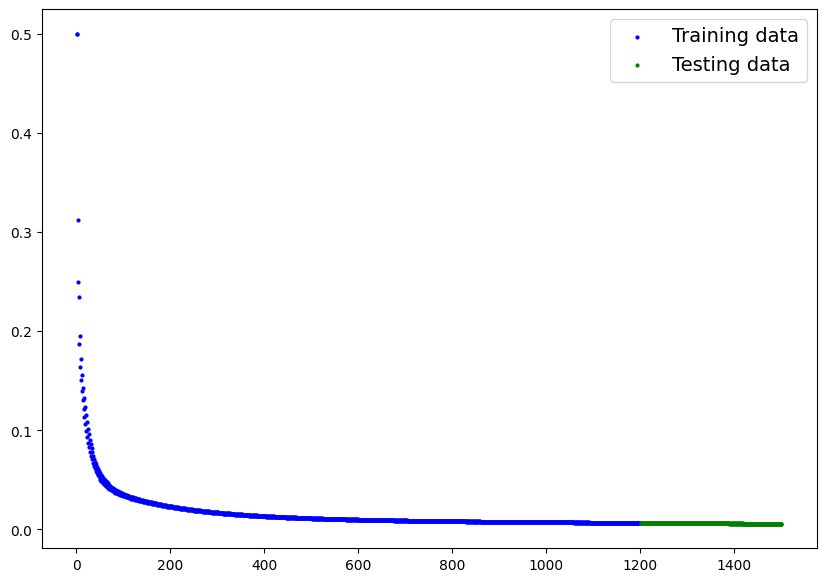

In [ ]:
## visualize, visualize, visualize

plot_predictions();

### Setup the model

In [ ]:
# Create a model class
class RepTheoryModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.scalar = nn.Parameter(torch.randn(1, # <- start with random value (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))
        self.error = nn.Parameter(torch.randn(1, # <- start with random value (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))
        self.alpha = nn.Parameter(torch.randn(1, # <- start with random value (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return (self.scalar + self.error*(-1)**x)*(x**(self.alpha)) # <- this is our guessed formula

In [ ]:
# Set manual seed since nn.Parameter are randomly initialzied
#torch.manual_seed(72)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = RepTheoryModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([-0.9884], requires_grad=True),
 Parameter containing:
 tensor([1.5062], requires_grad=True),
 Parameter containing:
 tensor([-0.0484], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('scalar', tensor([-0.9884])),
             ('error', tensor([1.5062])),
             ('alpha', tensor([-0.0484]))])

### Make some first predictions

Number of testing samples: 300
Number of predictions made: 300
Predicted values:
tensor([[-1.7700],
        [ 0.3673],
        [-1.7699],
        [ 0.3673],
        [-1.7698],
        [ 0.3673],
        [-1.7696],
        [ 0.3673],
        [-1.7695],
        [ 0.3672],
        [-1.7693],
        [ 0.3672],
        [-1.7692],
        [ 0.3672],
        [-1.7691],
        [ 0.3671],
        [-1.7689],
        [ 0.3671],
        [-1.7688],
        [ 0.3671],
        [-1.7686],
        [ 0.3671],
        [-1.7685],
        [ 0.3670],
        [-1.7684],
        [ 0.3670],
        [-1.7682],
        [ 0.3670],
        [-1.7681],
        [ 0.3669],
        [-1.7679],
        [ 0.3669],
        [-1.7678],
        [ 0.3669],
        [-1.7677],
        [ 0.3669],
        [-1.7675],
        [ 0.3668],
        [-1.7674],
        [ 0.3668],
        [-1.7672],
        [ 0.3668],
        [-1.7671],
        [ 0.3667],
        [-1.7670],
        [ 0.3667],
        [-1.7668],
        [ 0.3667],
       

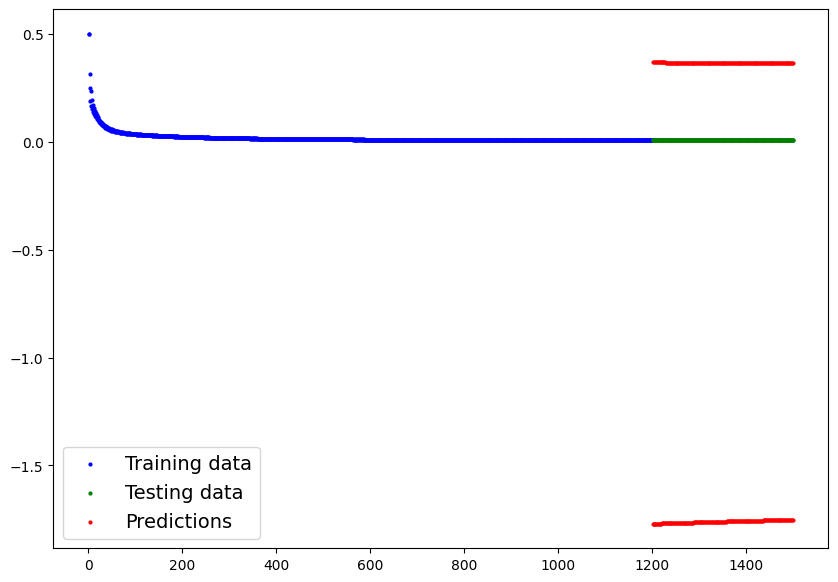

In [ ]:
# Make predictions with model
with torch.inference_mode():
    fn_preds = model_0(n_test)

# Check the predictions
print(f"Number of testing samples: {len(n_test)}")
print(f"Number of predictions made: {len(fn_preds)}")
print(f"Predicted values:\n{fn_preds}")

# Plot predictions
plot_predictions(predictions=fn_preds)

In [ ]:
# Prediction errors, looks pretty bad

fn_test - fn_preds

tensor([[ 1.7766],
        [-0.3607],
        [ 1.7765],
        [-0.3606],
        [ 1.7763],
        [-0.3606],
        [ 1.7762],
        [-0.3606],
        [ 1.7760],
        [-0.3606],
        [ 1.7759],
        [-0.3606],
        [ 1.7757],
        [-0.3605],
        [ 1.7756],
        [-0.3605],
        [ 1.7754],
        [-0.3605],
        [ 1.7753],
        [-0.3605],
        [ 1.7752],
        [-0.3604],
        [ 1.7750],
        [-0.3604],
        [ 1.7749],
        [-0.3604],
        [ 1.7747],
        [-0.3604],
        [ 1.7746],
        [-0.3603],
        [ 1.7744],
        [-0.3603],
        [ 1.7743],
        [-0.3603],
        [ 1.7741],
        [-0.3603],
        [ 1.7740],
        [-0.3603],
        [ 1.7738],
        [-0.3602],
        [ 1.7737],
        [-0.3602],
        [ 1.7736],
        [-0.3602],
        [ 1.7734],
        [-0.3602],
        [ 1.7733],
        [-0.3601],
        [ 1.7731],
        [-0.3601],
        [ 1.7730],
        [-0.3601],
        [ 1.

### Train the model

In [ ]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.055) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [ ]:
#torch.manual_seed(70)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 30000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    fn_pred = model_0(n_train)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(fn_pred, fn_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(n_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, fn_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 1000 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 1.1224732398986816 | MAE Test Loss: 0.0702323243021965 
Epoch: 1000 | MAE Train Loss: 0.020838677883148193 | MAE Test Loss: 0.00624954653903842 
Epoch: 2000 | MAE Train Loss: 0.020140713080763817 | MAE Test Loss: 0.006214732304215431 
Epoch: 3000 | MAE Train Loss: 0.019768858328461647 | MAE Test Loss: 0.0062064798548817635 
Epoch: 4000 | MAE Train Loss: 0.01949244737625122 | MAE Test Loss: 0.006203184369951487 
Epoch: 5000 | MAE Train Loss: 0.01925649680197239 | MAE Test Loss: 0.006201463285833597 
Epoch: 6000 | MAE Train Loss: 0.01903921365737915 | MAE Test Loss: 0.0062003545463085175 
Epoch: 7000 | MAE Train Loss: 0.018828701227903366 | MAE Test Loss: 0.006199468392878771 
Epoch: 8000 | MAE Train Loss: 0.018616043031215668 | MAE Test Loss: 0.006198571063578129 
Epoch: 9000 | MAE Train Loss: 0.018391884863376617 | MAE Test Loss: 0.006197410635650158 
Epoch: 10000 | MAE Train Loss: 0.018142499029636383 | MAE Test Loss: 0.006195528898388147 
Epoch: 11000 | MAE

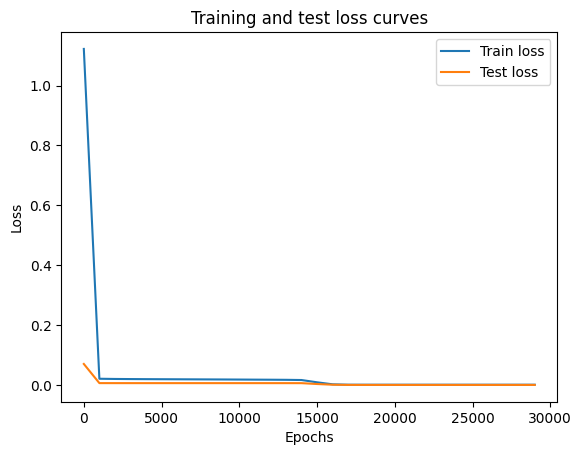

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# Find our model's learned parameters
print("The model learned the following values for our parameters are:")
print(model_0.state_dict())

The model learned the following values for our parameters are:
OrderedDict([('scalar', tensor([0.7718])), ('error', tensor([0.0245])), ('alpha', tensor([-0.6747]))])


### Making predictions with a trained model

In [ ]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  fn_preds = model_0(n_test)
fn_preds

tensor([[0.0062],
        [0.0067],
        [0.0062],
        [0.0066],
        [0.0062],
        [0.0066],
        [0.0062],
        [0.0066],
        [0.0062],
        [0.0066],
        [0.0062],
        [0.0066],
        [0.0062],
        [0.0066],
        [0.0062],
        [0.0066],
        [0.0062],
        [0.0066],
        [0.0062],
        [0.0066],
        [0.0062],
        [0.0066],
        [0.0062],
        [0.0066],
        [0.0062],
        [0.0066],
        [0.0062],
        [0.0066],
        [0.0062],
        [0.0066],
        [0.0061],
        [0.0065],
        [0.0061],
        [0.0065],
        [0.0061],
        [0.0065],
        [0.0061],
        [0.0065],
        [0.0061],
        [0.0065],
        [0.0061],
        [0.0065],
        [0.0061],
        [0.0065],
        [0.0061],
        [0.0065],
        [0.0061],
        [0.0065],
        [0.0061],
        [0.0065],
        [0.0061],
        [0.0065],
        [0.0061],
        [0.0065],
        [0.0061],
        [0

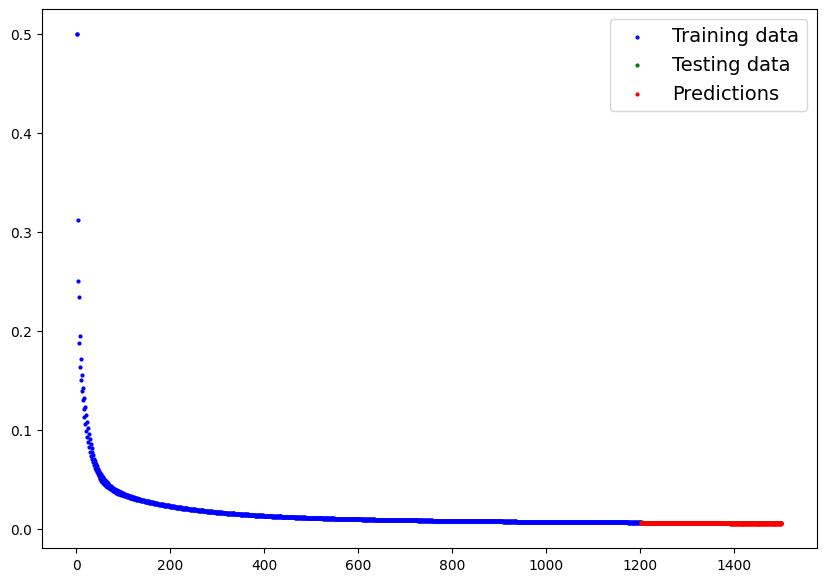

In [ ]:
# Visualize, visualize, visualize

plot_predictions(predictions=fn_preds)